# SWOT PIXC pre processing

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## One SWOT tile workflow

In [ ]:
# SWOT tiles that correspond to the Sag aufeis (poly 1):
# 024_029L
# 265_280L
# 330_030L
# 543_279L
# 302_029R
# 571_280R

# SWOT granuales:

# SWOT_L2_HR_PIXC_035_571_280R_20250720T003755_20250720T003806_PID0_01.nc
# SWOT_L2_HR_PIXC_034_571_280R_20250629T035249_20250629T035300_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_037_330_030L_20250822T024735_20250822T024746_PID0_01.nc
# SWOT_L2_HR_PIXC_036_024_029L_20250721T073933_20250721T073944_PID0_01.nc
# SWOT_L2_HR_PIXC_035_302_029R_20250710T091645_20250710T091656_PID0_01.nc
# SWOT_L2_HR_PIXC_034_330_030L_20250620T123219_20250620T123230_PID0_02.nc - EARLY
# SWOT_L2_HR_PIXC_036_330_030L_20250801T060230_20250801T060242_PID0_01.nc
# SWOT_L2_HR_PIXC_034_302_029R_20250619T123138_20250619T123149_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_036_571_280R_20250809T212258_20250809T212309_PID0_01.nc
# SWOT_L2_HR_PIXC_037_543_279L_20250829T180723_20250829T180734_PID0_01.nc
# SWOT_L2_HR_PIXC_033_571_280R_20250608T070744_20250608T070755_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_035_330_030L_20250711T091726_20250711T091737_PID0_01.nc
# SWOT_L2_HR_PIXC_036_302_029R_20250731T060149_20250731T060201_PID0_01.nc
# SWOT_L2_HR_PIXC_033_543_279L_20250607T070703_20250607T070714_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_035_543_279L_20250719T003714_20250719T003725_PID0_01.nc
# SWOT_L2_HR_PIXC_036_543_279L_20250808T212217_20250808T212228_PID0_01.nc
# SWOT_L2_HR_PIXC_034_024_029L_20250609T140922_20250609T140933_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_034_543_279L_20250628T035208_20250628T035219_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_037_571_280R_20250830T180804_20250830T180815_PID0_01.nc
# SWOT_L2_HR_PIXC_035_265_280L_20250709T021507_20250709T021518_PID0_01.nc
# SWOT_L2_HR_PIXC_035_024_029L_20250630T105428_20250630T105439_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_037_024_029L_20250811T042437_20250811T042448_PID0_01.nc
# SWOT_L2_HR_PIXC_037_265_280L_20250819T194516_20250819T194527_PID0_01.nc
# SWOT_L2_HR_PIXC_034_265_280L_20250618T053000_20250618T053011_PID0_01.nc - EARLY
# SWOT_L2_HR_PIXC_036_265_280L_20250729T230011_20250729T230023_PID0_01.nc
# SWOT_L2_HR_PIXC_037_302_029R_20250821T024654_20250821T024705_PID0_01.nc

In [6]:
# check to see what files have the tiles we are interested in

import os

# Directory to search
directory = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/"

# match by pass_tile id
segments = [
    "024_029L",
    "265_280L",
    "330_030L",
    "543_279L",
    "302_029R",
    "571_280R",
]

# list to store matches
matches = []

for fname in os.listdir(directory):
    if fname.endswith(".nc") and any(seg in fname for seg in segments):
        matches.append(fname)

# check the results
print("There are", len(matches), "matched tiles")
for m in matches:
    print(m)

There are 26 matched tiles
SWOT_L2_HR_PIXC_035_571_280R_20250720T003755_20250720T003806_PID0_01.nc
SWOT_L2_HR_PIXC_034_571_280R_20250629T035249_20250629T035300_PID0_01.nc
SWOT_L2_HR_PIXC_037_330_030L_20250822T024735_20250822T024746_PID0_01.nc
SWOT_L2_HR_PIXC_036_024_029L_20250721T073933_20250721T073944_PID0_01.nc
SWOT_L2_HR_PIXC_035_302_029R_20250710T091645_20250710T091656_PID0_01.nc
SWOT_L2_HR_PIXC_034_330_030L_20250620T123219_20250620T123230_PID0_02.nc
SWOT_L2_HR_PIXC_036_330_030L_20250801T060230_20250801T060242_PID0_01.nc
SWOT_L2_HR_PIXC_034_302_029R_20250619T123138_20250619T123149_PID0_01.nc
SWOT_L2_HR_PIXC_036_571_280R_20250809T212258_20250809T212309_PID0_01.nc
SWOT_L2_HR_PIXC_037_543_279L_20250829T180723_20250829T180734_PID0_01.nc
SWOT_L2_HR_PIXC_033_571_280R_20250608T070744_20250608T070755_PID0_01.nc
SWOT_L2_HR_PIXC_035_330_030L_20250711T091726_20250711T091737_PID0_01.nc
SWOT_L2_HR_PIXC_036_302_029R_20250731T060149_20250731T060201_PID0_01.nc
SWOT_L2_HR_PIXC_033_543_279L_20250607

In [2]:
# ---------- Filepath ----------
# of the form:
# ../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/SWOT_L2_HR_PIXC_035_543_279L_20250719T003714_20250719T003725_PID0_01.nc

aufeis_test_tile_filepath = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/SWOT_L2_HR_PIXC_035_571_280R_20250720T003755_20250720T003806_PID0_01.nc"

# NetCDF structure check
import netCDF4
data_structure = netCDF4.Dataset(aufeis_test_tile_filepath)
# print(data_structure) # shows 'groups: pixel_cloud, tvp, noise'

# file pointer
fp = xr.open_dataset(aufeis_test_tile_filepath, group = 'pixel_cloud')
# print(fp)
# print(fp.attrs)

In [ ]:
# Extract the variables we want into 1D numpy arrays
def getvar(name):
    return fp[name].values.ravel() if name in fp else np.nan

# Build a Pandas DataFrame
SWOT_Points = pd.DataFrame({
    "longitude": getvar("longitude"),
    "latitude": getvar("latitude"),
    "height": getvar("height"),
    "phase_noise_std": getvar("phase_noise_std"),
    "dheight": getvar("dheight_dphase"),
    "class": getvar("classification"),
    "classqual": getvar("classification"),
    "bright_land_flag": getvar("bright_land_flag"),
    "ancillary_surface_classification_flag": getvar("ancillary_surface_classification_flag"),
    "waterfrac": getvar("water_frac"),
    "waterfrac_uncert": getvar("water_frac_uncert"),
    "prior_water_prob": getvar("prior_water_prob"),
    "geolocqual": getvar("geolocation_qual"),
    "sig0": getvar("sig0"),
    "sig0_uncert": getvar("sig0_uncert"),
    "sig0_qual": getvar("sig0_qual"),
    "crosstrack": getvar("cross_track"),
    "pixel_area": getvar("pixel_area"),
#     "darea_dheight": getvar("darea_dheight"),
    # elevation corrections
    "geoid": getvar("geoid"),
    "solid_tide": getvar("solid_earth_tide"),
    "load_tide": getvar("load_tide_fes"),
    "pole_tide": getvar("pole_tide")
})

# Derive elevation & height uncertainty
# SWOT_Points["height_uncert"] = SWOT_Points["phase_noise_std"] * SWOT_Points["dheight"]
SWOT_Points["geoid_correction"] = SWOT_Points["geoid"] - SWOT_Points["solid_tide"] - SWOT_Points["load_tide"] - SWOT_Points["pole_tide"]
SWOT_Points["elevation"] = SWOT_Points["height"] - SWOT_Points["geoid_correction"]

# Drop any empty rows
SWOT_Points = SWOT_Points.dropna(how="all")

# Quality filtering
# geolocqual_problem_bits = {
#     4, 4101, 5, 6, 4100, 4102, 524292, 524293, 524294, 524295,
#     528389, 528390, 7, 528388, 16777220, 17301508, 17305604,
#     528391, 4103
# }

SWOT_Points = SWOT_Points[
#     (~SWOT_Points["geolocqual"].isin(geolocqual_problem_bits)) &
    (SWOT_Points["crosstrack"].abs().between(10000, 60000))]

print(SWOT_Points.head())
fp.close()

In [4]:
# Need to add metadata attributes

# Get the attributes of interest from the data_structure
cycle_number = data_structure.cycle_number
pass_number = data_structure.pass_number
tile_number = data_structure.tile_number
time_granule_start = data_structure.time_granule_start

# Add these as new columns to the SWOT_Points DataFrame
SWOT_Points["cycle_number"] = cycle_number
SWOT_Points["pass_number"] = pass_number
SWOT_Points["tile_number"] = tile_number
SWOT_Points["time"] = time_granule_start # just taking start time since it's a diff of seconds

In [5]:
# get ride of columns we no longer need

cols_to_drop_after_elevation = ["geoid_correction", "pole_tide", "load_tide", "solid_tide", "geoid", "height"]

for c in cols_to_drop_after_elevation:
    if c in SWOT_Points.columns:
        del SWOT_Points[c]

In [ ]:
# save as a csv
# output_csv = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/filtered_SWOT_PIXC_20250719.csv"

# SWOT_Points.to_csv(output_csv, index=False)

In [ ]:
# this block is taking forever on the docker
# so we ran it locally ...

# import geopandas as gpd

# # Create gdf with geometry from longitude/latitude
# gdf = gpd.GeoDataFrame(
#     SWOT_Points,
#     geometry=gpd.points_from_xy(SWOT_Points['longitude'], SWOT_Points['latitude']),
#     crs="EPSG:4326"  # this is a close enough realization for now...
# )

# # UTM zone 6N
# gdf_reprojected = gdf.to_crs("EPSG:4326")

# # Add reprojected coordinates to a new DataFrame
# SWOT_reprojected_df = SWOT_df.copy()
# SWOT_reprojected_df["x_utm"] = gdf_reprojected.geometry.x
# SWOT_reprojected_df["y_utm"] = gdf_reprojected.geometry.y

## Plot a SWOT tile

In [8]:
# plot the singular tile

# subset to just lat/lon and variable to plot (e.g. elevation, sig0)
SWOT_Points_for_plot = SWOT_Points.dropna(subset=["longitude","latitude","elevation"]).copy()

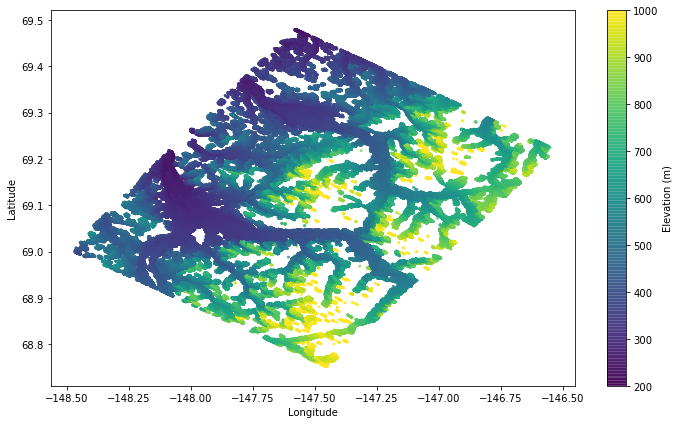

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter(SWOT_Points_for_plot["longitude"], SWOT_Points_for_plot["latitude"],
                c=SWOT_Points_for_plot["elevation"],
                cmap="viridis",           # change to "terrain", "plasma", etc.
                s=8,                      # marker size
                alpha=0.8,
                linewidth=0,
                vmin= 200, vmax= 1000)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_title("")
cbar = plt.colorbar(sc, ax=ax, label="Elevation (m)")
plt.tight_layout()
plt.show()

## Batch processing with initial date filtering

In [3]:
import os
import glob
import re
import traceback
from datetime import datetime, timedelta

import netCDF4
import numpy as np
import pandas as pd

# for fancy progress bars
from tqdm import tqdm

In [4]:
# ---------------------------------------------------------------------------------------------------------------
# Sentinel-2 dates

import pandas as pd
from datetime import datetime

# File path
csv_file_path = 'data/image_dates.csv'

# Read CSV and parse 'date' column as datetime
df = pd.read_csv(csv_file_path, parse_dates=['date'])

# Filter to dates after July 1, 2025
cutoff_date = datetime(2025, 7, 1)
date_objs = df[df['date'] > cutoff_date]['date'].tolist()

day_tolerance = 1

# Display results
print(len(date_objs))

35


In [5]:
# ---------------------------
# setup
# ---------------------------
base_dir = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data"
pattern = os.path.join(base_dir, "SWOT_L2_HR_PIXC_*.nc")

# regex to find timestamps like 20250605T070551 in filenames
timestamp_re = re.compile(r"\d{8}T\d{6}")

# geolocqual problem bits
geolocqual_problem_bits = {
    4, 4101, 5, 6, 4100, 4102, 524292, 524293, 524294, 524295,
    528389, 528390, 7, 528388, 16777220, 17301508, 17305604,
    528391, 4103
}

# mapping from netCDF variable names to DataFrame column names
mapping = {
    "longitude": "longitude",
    "latitude": "latitude",
    "height": "height",
    "phase_noise_std": "phase_noise_std",
#     "dheight_dphase": "dheight",
#     "classification": "classification",
#     "bright_land_flag": "bright_land_flag",
#     "ancillary_surface_classification_flag": "ancillary_surface_classification_flag",
    "water_frac": "waterfrac",
#     "water_frac_uncert": "waterfrac_uncert",
#     "prior_water_prob": "prior_water_prob",
    "geolocation_qual": "geolocqual",
    "sig0": "sig0",
    "sig0_uncert": "sig0_uncert",
#     "sig0_qual": "sig0_qual",
    "cross_track": "crosstrack",
#     "pixel_area": "pixel_area",
#     "darea_dheight": "darea_dheight",
    "geoid": "geoid",
    "solid_earth_tide": "solid_tide",
    "load_tide_fes": "load_tide",
    "pole_tide": "pole_tide"
}

# Columns to drop computing elevation (attempting to reduce written file size & memory here)
cols_to_drop_after_elevation = [
    "geoid_correction", "pole_tide", "load_tide", "solid_tide", "geoid", "height"
]

In [6]:
# ---------------------------
# Helpers
# ---------------------------
def safe_var_read(group, varname):
    """Read a variable from a netCDF4 group safely. Return numpy array or None."""
    if varname not in group.variables:
        return None
    var = group.variables[varname]
    arr = var[:]
    if np.ma.isMaskedArray(arr):
        arr = arr.filled(np.nan)
    return np.asarray(arr)


def process_single_file(nc_path, geolocqual_problem_bits=geolocqual_problem_bits):
    """
    Memory-efficient processing: read small variables first, compute mask,
    then read only masked indices for other variables.
    Returns a DataFrame (or None on error / empty).
    """
    try:
        with netCDF4.Dataset(nc_path, mode="r") as ds_root:
            # access pixel_cloud group if present
            grp = ds_root.groups.get("pixel_cloud", ds_root)

            # read minimal variables for mask
            geolocqual = safe_var_read(grp, "geolocation_qual")
            crosstrack = safe_var_read(grp, "cross_track")

            if geolocqual is None or crosstrack is None:
                print(f"Missing geolocqual or crosstrack in {nc_path}; skipping file.")
                return None

            geolocqual = np.asarray(geolocqual).ravel()
            crosstrack = np.asarray(crosstrack).ravel()

            # prepare integer version of geolocqual (NaNs -> sentinel)
            valid_mask_geo = ~np.isnan(geolocqual)
            geolocqual_int = np.full(geolocqual.shape, -999999, dtype=np.int64)
            if valid_mask_geo.any():
                geolocqual_int[valid_mask_geo] = geolocqual[valid_mask_geo].astype(np.int64)

            mask_geoloc = ~np.isin(geolocqual_int, list(geolocqual_problem_bits))

            abs_ct = np.abs(crosstrack)
            mask_crosstrack = (abs_ct >= 10000) & (abs_ct <= 60000)

            good_mask = mask_geoloc & mask_crosstrack

            if not np.any(good_mask):
                return None

            n_good = int(np.count_nonzero(good_mask))
            data = {}

            # read each variable but only keep good_mask indices (defensive about missing vars)
            for varname, colname in mapping.items():
                if varname == "geolocation_qual":
                    data[colname] = geolocqual[good_mask]
                    continue
                if varname == "cross_track":
                    data[colname] = crosstrack[good_mask]
                    continue

                arr = safe_var_read(grp, varname)
                if arr is None:
                    data[colname] = np.full(n_good, np.nan)
                else:
                    arr = np.asarray(arr).ravel()
                    if arr.shape[0] < good_mask.shape[0]:
                        tmp = np.full(good_mask.shape[0], np.nan)
                        tmp[: arr.shape[0]] = arr
                        arr = tmp
                    data[colname] = arr[good_mask]

            # build dataframe and derived columns
            SWOT_df = pd.DataFrame(data)

            geoid_vals = np.asarray(SWOT_df["geoid"].values, dtype=float)
            solid_tide_vals = np.asarray(SWOT_df["solid_tide"].values, dtype=float)
            load_tide_vals = np.asarray(SWOT_df["load_tide"].values, dtype=float)
            pole_tide_vals = np.asarray(SWOT_df["pole_tide"].values, dtype=float)
            SWOT_df["geoid_correction"] = geoid_vals - solid_tide_vals - load_tide_vals - pole_tide_vals

            height_vals = np.asarray(SWOT_df["height"].values, dtype=float)
            SWOT_df["elevation"] = height_vals - SWOT_df["geoid_correction"].values
            
            # ---- DROP heavy/intermediate columns BEFORE writing ----
            for c in cols_to_drop_after_elevation:
                if c in SWOT_df.columns:
                    del SWOT_df[c]

            SWOT_df = SWOT_df.dropna(how="all")
            if SWOT_df.empty:
                return None

            # attach root-level metadata
            def safe_attr(ds, name):
                return getattr(ds, name, np.nan)

            SWOT_df["cycle_number"] = safe_attr(ds_root, "cycle_number")
            SWOT_df["pass_number"] = safe_attr(ds_root, "pass_number")
            SWOT_df["tile_number"] = safe_attr(ds_root, "tile_number")
            SWOT_df["time_granule_start"] = safe_attr(ds_root, "time_granule_start")
            SWOT_df["source_file"] = os.path.basename(nc_path)

            return SWOT_df

    except Exception as e:
        print(f"Error processing {nc_path}: {e}")
        traceback.print_exc()
        return None

In [7]:
# ---------------------------
# Main!!! find files, extract timestamps, filter, process
# ---------------------------
def main():
    # find all files
    all_files = sorted(glob.glob(pattern))
    print(f"Found {len(all_files)} files matching pattern.")

    # extract timestamps from filenames
    file_to_ts = {}
    for f in all_files:
        m = timestamp_re.search(os.path.basename(f))
        if m:
            ts = m.group()  # e.g., "20250605T070551"
            file_to_ts[f] = ts

    # filter timestamps to those within +/- day_tolerance of any target date
    filtered_timestamps = []
    for ts in sorted(set(file_to_ts.values())):
        ts_date = datetime.strptime(ts[:8], "%Y%m%d")
        if any(abs((ts_date - d).days) <= day_tolerance for d in date_objs):
            filtered_timestamps.append(ts)

    print(f"Found {len(filtered_timestamps)} timestamps within +/-{day_tolerance} days of targets.")
    if filtered_timestamps:
        print("Filtered timestamps (sample):", filtered_timestamps[:10])

    # filter files to only those containing a kept timestamp
    filtered_files = [f for f, ts in file_to_ts.items() if ts in filtered_timestamps]
    print(f"Filtered to {len(filtered_files)} files to process.")

    # optional: show unique days in filtered_timestamps
    unique_days = sorted({ts[:8] for ts in filtered_timestamps})
    print("Unique days in filtered timestamps:", unique_days)
    print("Total unique days:", len(unique_days))
            
    dfs = []
    for i, f in enumerate(tqdm(filtered_files), 1):
        print(f"\n[{i}/{len(filtered_files)}] Processing: {os.path.basename(f)}")
        df = process_single_file(f)
        if df is not None and not df.empty:
            dfs.append(df)
            print(f"Completed: {os.path.basename(f)} ({len(df)} rows)")
        else:
            print(f"Skipping empty/failed result for {os.path.basename(f)}")

    if dfs:
        SWOT_Points_all = pd.concat(dfs, ignore_index=True)
        print("Combined DataFrame shape:", SWOT_Points_all.shape)
    else:
        SWOT_Points_all = pd.DataFrame()
        print("No valid data found in filtered files.")

    # return the DataFrame and some metadata for further use
    return {
        "SWOT_Points_all": SWOT_Points_all,
        "filtered_files": filtered_files,
        "filtered_timestamps": filtered_timestamps,
        "unique_days": unique_days
    }


if __name__ == "__main__":
    results = main()
    # proof that it worked plz
    if not results["SWOT_Points_all"].empty:
        print(results["SWOT_Points_all"].head())

  0%|          | 0/36 [00:00<?, ?it/s]

Found 135 files matching pattern.
Found 33 timestamps within +/-1 days of targets.
Filtered timestamps (sample): ['20250701T105509', '20250706T021314', '20250707T021355', '20250717T003602', '20250718T003643', '20250718T003653', '20250719T003714', '20250719T003724', '20250719T003734', '20250719T073822']
Filtered to 36 files to process.
Unique days in filtered timestamps: ['20250701', '20250706', '20250707', '20250717', '20250718', '20250719', '20250720', '20250721', '20250726', '20250727', '20250728', '20250731', '20250801', '20250806', '20250807', '20250808', '20250811', '20250812', '20250816', '20250817']
Total unique days: 20

[1/36] Processing: SWOT_L2_HR_PIXC_035_052_030L_20250701T105509_20250701T105520_PID0_01.nc


  3%|▎         | 1/36 [00:00<00:28,  1.24it/s]

Completed: SWOT_L2_HR_PIXC_035_052_030L_20250701T105509_20250701T105520_PID0_01.nc (197238 rows)

[2/36] Processing: SWOT_L2_HR_PIXC_035_181_278L_20250706T021314_20250706T021325_PID0_01.nc


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater_equal
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less_equal
  6%|▌         | 2/36 [00:01<00:23,  1.43it/s]

Completed: SWOT_L2_HR_PIXC_035_181_278L_20250706T021314_20250706T021325_PID0_01.nc (79960 rows)

[3/36] Processing: SWOT_L2_HR_PIXC_035_209_279R_20250707T021355_20250707T021406_PID0_01.nc


  8%|▊         | 3/36 [00:01<00:18,  1.77it/s]

Completed: SWOT_L2_HR_PIXC_035_209_279R_20250707T021355_20250707T021406_PID0_01.nc (52322 rows)

[4/36] Processing: SWOT_L2_HR_PIXC_035_487_278R_20250717T003602_20250717T003613_PID0_01.nc


 11%|█         | 4/36 [00:01<00:16,  1.93it/s]

Completed: SWOT_L2_HR_PIXC_035_487_278R_20250717T003602_20250717T003613_PID0_01.nc (51956 rows)

[5/36] Processing: SWOT_L2_HR_PIXC_035_515_279L_20250718T003643_20250718T003654_PID0_01.nc


 14%|█▍        | 5/36 [00:02<00:18,  1.67it/s]

Completed: SWOT_L2_HR_PIXC_035_515_279L_20250718T003643_20250718T003654_PID0_01.nc (156619 rows)

[6/36] Processing: SWOT_L2_HR_PIXC_035_515_280L_20250718T003653_20250718T003704_PID0_01.nc


 17%|█▋        | 6/36 [00:03<00:18,  1.61it/s]

Completed: SWOT_L2_HR_PIXC_035_515_280L_20250718T003653_20250718T003704_PID0_01.nc (175026 rows)

[7/36] Processing: SWOT_L2_HR_PIXC_035_543_279L_20250719T003714_20250719T003725_PID0_01.nc


 19%|█▉        | 7/36 [00:04<00:18,  1.56it/s]

Completed: SWOT_L2_HR_PIXC_035_543_279L_20250719T003714_20250719T003725_PID0_01.nc (159969 rows)

[8/36] Processing: SWOT_L2_HR_PIXC_035_543_280R_20250719T003724_20250719T003735_PID0_01.nc


 22%|██▏       | 8/36 [00:04<00:19,  1.41it/s]

Completed: SWOT_L2_HR_PIXC_035_543_280R_20250719T003724_20250719T003735_PID0_01.nc (135038 rows)

[9/36] Processing: SWOT_L2_HR_PIXC_035_543_281R_20250719T003734_20250719T003744_PID0_01.nc


 25%|██▌       | 9/36 [00:05<00:19,  1.40it/s]

Completed: SWOT_L2_HR_PIXC_035_543_281R_20250719T003734_20250719T003744_PID0_01.nc (207151 rows)

[10/36] Processing: SWOT_L2_HR_PIXC_035_552_028R_20250719T073822_20250719T073832_PID0_01.nc


 28%|██▊       | 10/36 [00:06<00:16,  1.56it/s]

Completed: SWOT_L2_HR_PIXC_035_552_028R_20250719T073822_20250719T073832_PID0_01.nc (99673 rows)

[11/36] Processing: SWOT_L2_HR_PIXC_035_552_031R_20250719T073851_20250719T073902_PID0_01.nc


 31%|███       | 11/36 [00:06<00:13,  1.79it/s]

Completed: SWOT_L2_HR_PIXC_035_552_031R_20250719T073851_20250719T073902_PID0_01.nc (46199 rows)

[12/36] Processing: SWOT_L2_HR_PIXC_035_571_280R_20250720T003755_20250720T003806_PID0_01.nc


 33%|███▎      | 12/36 [00:06<00:12,  1.87it/s]

Completed: SWOT_L2_HR_PIXC_035_571_280R_20250720T003755_20250720T003806_PID0_01.nc (107186 rows)

[13/36] Processing: SWOT_L2_HR_PIXC_035_580_029L_20250720T073902_20250720T073913_PID0_01.nc


 36%|███▌      | 13/36 [00:07<00:12,  1.78it/s]

Completed: SWOT_L2_HR_PIXC_035_580_029L_20250720T073902_20250720T073913_PID0_01.nc (111584 rows)

[14/36] Processing: SWOT_L2_HR_PIXC_035_580_029R_20250720T073902_20250720T073913_PID0_01.nc


 39%|███▉      | 14/36 [00:08<00:12,  1.77it/s]

Completed: SWOT_L2_HR_PIXC_035_580_029R_20250720T073902_20250720T073913_PID0_01.nc (96461 rows)

[15/36] Processing: SWOT_L2_HR_PIXC_035_580_031L_20250720T073922_20250720T073933_PID0_01.nc


 42%|████▏     | 15/36 [00:08<00:11,  1.81it/s]

Completed: SWOT_L2_HR_PIXC_035_580_031L_20250720T073922_20250720T073933_PID0_01.nc (68084 rows)

[16/36] Processing: SWOT_L2_HR_PIXC_036_024_029L_20250721T073933_20250721T073944_PID0_01.nc


 44%|████▍     | 16/36 [00:09<00:10,  1.92it/s]

Completed: SWOT_L2_HR_PIXC_036_024_029L_20250721T073933_20250721T073944_PID0_01.nc (69907 rows)

[17/36] Processing: SWOT_L2_HR_PIXC_036_024_029R_20250721T073933_20250721T073944_PID0_01.nc


 47%|████▋     | 17/36 [00:09<00:10,  1.87it/s]

Completed: SWOT_L2_HR_PIXC_036_024_029R_20250721T073933_20250721T073944_PID0_01.nc (167923 rows)

[18/36] Processing: SWOT_L2_HR_PIXC_036_024_030L_20250721T073943_20250721T073954_PID0_01.nc


 50%|█████     | 18/36 [00:10<00:10,  1.78it/s]

Completed: SWOT_L2_HR_PIXC_036_024_030L_20250721T073943_20250721T073954_PID0_01.nc (112321 rows)

[19/36] Processing: SWOT_L2_HR_PIXC_036_181_278L_20250726T225819_20250726T225830_PID0_01.nc


 53%|█████▎    | 19/36 [00:10<00:09,  1.86it/s]

Completed: SWOT_L2_HR_PIXC_036_181_278L_20250726T225819_20250726T225830_PID0_01.nc (79658 rows)

[20/36] Processing: SWOT_L2_HR_PIXC_036_209_279R_20250727T225900_20250727T225911_PID0_01.nc


 56%|█████▌    | 20/36 [00:11<00:07,  2.18it/s]

Completed: SWOT_L2_HR_PIXC_036_209_279R_20250727T225900_20250727T225911_PID0_01.nc (53283 rows)

[21/36] Processing: SWOT_L2_HR_PIXC_036_237_279L_20250728T225930_20250728T225942_PID0_01.nc


 58%|█████▊    | 21/36 [00:11<00:07,  2.05it/s]

Completed: SWOT_L2_HR_PIXC_036_237_279L_20250728T225930_20250728T225942_PID0_01.nc (84622 rows)

[22/36] Processing: SWOT_L2_HR_PIXC_036_302_029R_20250731T060149_20250731T060201_PID0_01.nc


 61%|██████    | 22/36 [00:12<00:07,  1.79it/s]

Completed: SWOT_L2_HR_PIXC_036_302_029R_20250731T060149_20250731T060201_PID0_01.nc (165451 rows)

[23/36] Processing: SWOT_L2_HR_PIXC_036_302_030L_20250731T060159_20250731T060211_PID0_01.nc


 64%|██████▍   | 23/36 [00:13<00:08,  1.48it/s]

Completed: SWOT_L2_HR_PIXC_036_302_030L_20250731T060159_20250731T060211_PID0_01.nc (136982 rows)

[24/36] Processing: SWOT_L2_HR_PIXC_036_330_030L_20250801T060230_20250801T060242_PID0_01.nc


 67%|██████▋   | 24/36 [00:13<00:07,  1.53it/s]

Completed: SWOT_L2_HR_PIXC_036_330_030L_20250801T060230_20250801T060242_PID0_01.nc (145907 rows)

[25/36] Processing: SWOT_L2_HR_PIXC_036_487_278R_20250806T212105_20250806T212116_PID0_01.nc


 69%|██████▉   | 25/36 [00:14<00:06,  1.75it/s]

Completed: SWOT_L2_HR_PIXC_036_487_278R_20250806T212105_20250806T212116_PID0_01.nc (47848 rows)

[26/36] Processing: SWOT_L2_HR_PIXC_036_515_279L_20250807T212146_20250807T212157_PID0_01.nc


 72%|███████▏  | 26/36 [00:15<00:06,  1.55it/s]

Completed: SWOT_L2_HR_PIXC_036_515_279L_20250807T212146_20250807T212157_PID0_01.nc (164324 rows)

[27/36] Processing: SWOT_L2_HR_PIXC_036_515_280L_20250807T212156_20250807T212207_PID0_01.nc


 75%|███████▌  | 27/36 [00:15<00:06,  1.47it/s]

Completed: SWOT_L2_HR_PIXC_036_515_280L_20250807T212156_20250807T212207_PID0_01.nc (182603 rows)

[28/36] Processing: SWOT_L2_HR_PIXC_036_543_279L_20250808T212217_20250808T212228_PID0_01.nc


 78%|███████▊  | 28/36 [00:16<00:05,  1.45it/s]

Completed: SWOT_L2_HR_PIXC_036_543_279L_20250808T212217_20250808T212228_PID0_01.nc (156913 rows)

[29/36] Processing: SWOT_L2_HR_PIXC_036_543_280R_20250808T212227_20250808T212238_PID0_01.nc


 81%|████████  | 29/36 [00:17<00:05,  1.39it/s]

Completed: SWOT_L2_HR_PIXC_036_543_280R_20250808T212227_20250808T212238_PID0_01.nc (120013 rows)

[30/36] Processing: SWOT_L2_HR_PIXC_036_543_281R_20250808T212237_20250808T212247_PID0_01.nc


 83%|████████▎ | 30/36 [00:18<00:04,  1.42it/s]

Completed: SWOT_L2_HR_PIXC_036_543_281R_20250808T212237_20250808T212247_PID0_01.nc (163933 rows)

[31/36] Processing: SWOT_L2_HR_PIXC_037_024_029L_20250811T042437_20250811T042448_PID0_01.nc


 86%|████████▌ | 31/36 [00:18<00:03,  1.51it/s]

Completed: SWOT_L2_HR_PIXC_037_024_029L_20250811T042437_20250811T042448_PID0_01.nc (104752 rows)

[32/36] Processing: SWOT_L2_HR_PIXC_037_024_029R_20250811T042437_20250811T042448_PID0_01.nc


 89%|████████▉ | 32/36 [00:19<00:02,  1.56it/s]

Completed: SWOT_L2_HR_PIXC_037_024_029R_20250811T042437_20250811T042448_PID0_01.nc (219996 rows)

[33/36] Processing: SWOT_L2_HR_PIXC_037_024_030L_20250811T042447_20250811T042458_PID0_01.nc


 92%|█████████▏| 33/36 [00:19<00:01,  1.54it/s]

Completed: SWOT_L2_HR_PIXC_037_024_030L_20250811T042447_20250811T042458_PID0_01.nc (145709 rows)

[34/36] Processing: SWOT_L2_HR_PIXC_037_052_030L_20250812T042518_20250812T042529_PID0_01.nc


 94%|█████████▍| 34/36 [00:20<00:01,  1.45it/s]

Completed: SWOT_L2_HR_PIXC_037_052_030L_20250812T042518_20250812T042529_PID0_01.nc (213648 rows)

[35/36] Processing: SWOT_L2_HR_PIXC_037_181_278L_20250816T194323_20250816T194334_PID0_01.nc


 97%|█████████▋| 35/36 [00:21<00:00,  1.58it/s]

Completed: SWOT_L2_HR_PIXC_037_181_278L_20250816T194323_20250816T194334_PID0_01.nc (81799 rows)

[36/36] Processing: SWOT_L2_HR_PIXC_037_209_279R_20250817T194404_20250817T194415_PID0_01.nc


100%|██████████| 36/36 [00:21<00:00,  1.90it/s]

Completed: SWOT_L2_HR_PIXC_037_209_279R_20250817T194404_20250817T194415_PID0_01.nc (61006 rows)


Combined DataFrame shape: (4423064, 14)
    longitude   latitude  phase_noise_std  waterfrac  geolocqual        sig0  \
0 -149.552404  69.236015         0.045659   0.167256           0   24.465372   
1 -149.551882  69.236147         0.031159   1.224904           0  322.846558   
2 -149.551167  69.236328         0.026563   2.583732           0  965.866943   
3 -149.550266  69.236555         0.022460   1.348676           0  588.309814   
4 -149.549266  69.236808         0.023962   0.945739           0  326.267853   

   sig0_uncert    crosstrack   elevation  cycle_number  pass_number  \
0    11.847507 -13393.489258  296.291781            35           52   
1   151.669876 -13441.602539  295.972732            35           52   
2   452.993774 -13492.628906  295.815024            35           52   
3   276.064575 -13541.678711  295.813125            35           52   
4   153.266998 -13596.972656  295.896783            35           52   

   tile_number           time_granule_start  \
0    

In [15]:
# save as a csv

output_csv = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/filtered_SWOT_PIXC.csv"

results["SWOT_Points_all"].to_csv(output_csv, index=False)

In [16]:
# save as a python pickle

import pickle
output_pkl = "../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/filtered_SWOT_PIXC.pkl"

results["SWOT_Points_all"].to_pickle(output_pkl)

# this is MUCH faster